### This is a file for the GSS 1972-2021 Survey in comparing participants survey responses in relation to their Zodiac sign (birthdate) to see if any predictive drivers can be found.

In [90]:
# imports to support code:
import pandas as pd 
import numpy as np
%matplotlib inline


In [2]:
#creating a function to run all stata files through to create multiple tables (must convert categoricals as the stata
#data is not reading fully through, so this will number the answer given here)
def get_gss(filename):
    df = pd.read_stata(filename,convert_categoricals=False)
    return df

In [3]:
#using function to call in 1972 GSS survey
df1972 = get_gss('GSS1972.dta')
df1972.head(3)

,found,occ10,occindv,occstatus,occtag,prestg10,prestg105plus,indus10,indstatus,indtag,...,sphour,spevwork,if68who,wksups,racclos,racdis,racinteg,chldnum,chldsoon,other
0,1,520.0,1.0,3,1,45.0,49.0,5170.0,3,1,...,NaN,NaN,NaN,4.0,1.0,1.0,2.0,2.0,1.0,NaN
1,1,7700.0,1.0,3,1,50.0,62.0,6470.0,3,1,...,NaN,2.0,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN
2,0,4920.0,NaN,6,2,49.0,69.0,7070.0,6,2,...,4.0,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,NaN


In [4]:
#just to get an idea of this data's info.
df1972.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 0 to 1612
Columns: 206 entries, found to other
dtypes: float64(169), int16(3), int8(34)
memory usage: 2.2 MB


In [5]:
#getting column names to decide what might later be useful to merge dfs on:
for col in df1972.columns:
    print(col)


found
occ10
occindv
occstatus
occtag
prestg10
prestg105plus
indus10
indstatus
indtag
spocc10
spoccindv
spoccstatus
spocctag
sppres10
sppres105plus
spind10
spindstatus
spindtag
paocc10
paoccindv
paoccstatus
paocctag
papres10
papres105plus
paind10
paindstatus
paindtag
maocc10
maoccindv
maoccstatus
maocctag
mapres10
mapres105plus
maind10
maindstatus
maindtag
sei10
spsei10
pasei10
masei10
sei10educ
spsei10educ
pasei10educ
masei10educ
sei10inc
spsei10inc
pasei10inc
masei10inc
adults
babies
family16
formwt
hompop
id
marital
oversamp
preteen
race
reg16
region
sample
sex
size
srcbelt
teens
wrkstat
wtss
wtssall
wtssnr
xnorcsiz
year
health
news
res16
age
cohort
educ
relig
satfin
partyid
happy
sibs
childs
class
attend
coop2
comprend
finrela
trust
povline
fair
incom16
degree
finalter
helpful
vote68
ethnum
chldmore
earnrs
fework
spkath
fund
racschol
gunlaw
mobile16
spkcom
chldidel
libath
busing
abhlth
colath
premarsx
income72
spksoc
fepres
libcom
abnomore
abdefect
abrape
abpoor
absingle
colcom
libs

In [42]:
#looks like each df has an id, but this number resets each year with new respondents, so I will need to union merger datasets:
df1972.id

0          1
1          2
2          3
3          4
4          5
        ... 
1608    1609
1609    1610
1610    1611
1611    1612
1612    1613
Name: id, Length: 1613, dtype: int16

In [6]:
#repeating for the following year, just to see that it works:
df1973 = get_gss('GSS1973.dta')
df1973.head(3)

,found,occ10,occindv,occstatus,occtag,prestg10,prestg105plus,indus10,indstatus,indtag,...,hitnum,famdif16,gunage,gunnum,other,oth16,spother,spoth16,hrs2,sphrs2
0,0,8350.0,NaN,6,2,42.0,46.0,9997.0,7,3,...,2.0,1.0,2.0,NaN,45.0,NaN,45.0,NaN,NaN,NaN
1,1,8000.0,1.0,3,1,28.0,19.0,3490.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,8740.0,1.0,3,1,39.0,38.0,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
#however I think each year the id numbers get used on new survey submissions (not the same people?):
df1973.id

0          1
1          2
2          3
3          4
4          5
        ... 
1499    1500
1500    1501
1501    1502
1502    1503
1503    1504
Name: id, Length: 1504, dtype: int16

In [7]:
#calling in all years
df1974 = get_gss('GSS1974.dta')

In [8]:
#Some of the stata files read errors. I'll need to set categoricals to false (Added to the original function)
#df1975 = get_gss('GSS1975.dta')

In [9]:
#checking that adding the false statement worked:
df1975 = get_gss('GSS1975.dta')
df1975.head(3)

,found,occ10,occindv,occstatus,occtag,prestg10,prestg105plus,indus10,indstatus,indtag,...,away12,away6,away8,away9,mar10,mar13,where12,where6,where8,where9
0,0,6520.0,NaN,6,2,35.0,29.0,3360.0,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,NaN,NaN,4,2,NaN,NaN,NaN,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,5850.0,NaN,6,2,32.0,21.0,7290.0,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df1976 = get_gss('GSS1976.dta')

In [11]:
df1977 = get_gss('GSS1977.dta')

In [12]:
df1978 = get_gss('GSS1978.dta')

In [13]:
df1980 = get_gss('GSS1980.dta')

In [14]:
df1982 = get_gss('GSS1982.dta')

In [15]:
df1983 = get_gss('GSS1983.dta')

In [16]:
df1984 = get_gss('GSS1984.dta')

In [17]:
df1985 = get_gss('GSS1985.dta')

In [18]:
df1986 = get_gss('GSS1986.dta')

In [19]:
df1987 = get_gss('GSS1987.dta')

In [20]:
df1988 = get_gss('GSS1988.dta')

In [21]:
df1989 = get_gss('GSS1989.dta')

In [22]:
df1990 = get_gss('GSS1990.dta')

In [23]:
df1991 = get_gss('GSS1991.dta')

In [24]:
df1993 = get_gss('GSS1993.dta')

In [25]:
df1994 = get_gss('GSS1994.dta')

In [26]:
df1996 = get_gss('GSS1996.dta')

In [27]:
df1998 = get_gss('GSS1998.dta')

In [28]:
df2000 = get_gss('GSS2000.dta')

In [29]:
df2002 = get_gss('GSS2002.dta')

In [30]:
df2004 = get_gss('GSS2004.dta')

In [31]:
df2006 = get_gss('GSS2006.dta')

In [32]:
df2008 = get_gss('GSS2008.dta')

In [33]:
df2010 = get_gss('GSS2010.dta')

In [34]:
df2012 = get_gss('GSS2012.dta')

In [35]:
df2014 = get_gss('GSS2014.dta')

In [36]:
df2016 = get_gss('GSS2016.dta')

In [37]:
df2018 = get_gss('GSS2018.dta')

In [38]:
df2021 = get_gss('GSS2021.dta')
df2021.head(3)

/usr/local/anaconda3/lib/python3.9/site-packages/pandas/io/stata.py:1457: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  warnings.warn(msg, UnicodeWarning)


,year,id,wrkstat,hrs1,hrs2,wrkslf,wrkgovt,occ10,prestg10,indus10,...,relitennv,biblenv,postlifenv,kidssolnv,uscitznnv,fucitznnv,fepolnv,scibnftsnv,abanyg,fileversion
0,2021,1,1.0,36.0,NaN,2.0,NaN,5400.0,38.0,7980.0,...,2.0,2.0,2.0,4.0,NaN,NaN,NaN,2.0,2.0,7221.2
1,2021,2,1.0,45.0,NaN,2.0,NaN,40.0,57.0,7470.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7221.2
2,2021,3,2.0,16.0,NaN,2.0,NaN,7750.0,35.0,4770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,7221.2


### Merging Datasets:
I know that some years added new questions, so I will need to look at the null values as each year might add new questions. These may need to be taken off for outliers.

In [43]:
#merging Datasets by decades:
df1=pd.concat([df1972,df1973])

In [49]:
df2=pd.concat([df1,df1974])
df3=pd.concat([df2,df1975])

In [50]:
df4=pd.concat([df3,df1976])
df5=pd.concat([df4,df1977])

In [51]:
df70=pd.concat([df5,df1978])

In [52]:
#final 70's decade dataset:
df70.head(10)

,found,occ10,occindv,occstatus,occtag,prestg10,prestg105plus,indus10,indstatus,indtag,...,chlddth,socpars,evsmoke,polviewy,eqwlthy,eqwlth,grassy,divlawy,quitsmk,death
0,1,520.0,1.0,3,1,45.0,49.0,5170.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7700.0,1.0,3,1,50.0,62.0,6470.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,4920.0,NaN,6,2,49.0,69.0,7070.0,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,800.0,1.0,3,1,60.0,85.0,5170.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5020.0,1.0,3,1,31.0,21.0,6680.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,4850.0,1.0,3,1,45.0,55.0,3390.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,6440.0,NaN,6,2,43.0,50.0,770.0,6,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,5350.0,1.0,3,1,33.0,21.0,4080.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,4020.0,NaN,6,2,33.0,24.0,9997.0,7,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,4230.0,1.0,3,1,25.0,14.0,9290.0,3,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#looking at main info on new dataset:
df70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10652 entries, 0 to 1531
Columns: 609 entries, found to death
dtypes: float64(578), int16(3), int8(28)
memory usage: 47.4 MB


In [71]:
#looking at which columns in which dtypes:
list(df70.select_dtypes(['integer']).columns)
   

['found',
 'occstatus',
 'occtag',
 'indstatus',
 'indtag',
 'spoccstatus',
 'spocctag',
 'spindstatus',
 'spindtag',
 'paoccstatus',
 'paocctag',
 'paindstatus',
 'paindtag',
 'maoccstatus',
 'maocctag',
 'maindstatus',
 'maindtag',
 'id',
 'oversamp',
 'race',
 'reg16',
 'region',
 'sample',
 'sex',
 'size',
 'srcbelt',
 'wrkstat',
 'wtss',
 'wtssnr',
 'xnorcsiz',
 'year']

In [77]:
list(df70.select_dtypes(['float']).columns)


['occ10',
 'occindv',
 'prestg10',
 'prestg105plus',
 'indus10',
 'spocc10',
 'spoccindv',
 'sppres10',
 'sppres105plus',
 'spind10',
 'paocc10',
 'paoccindv',
 'papres10',
 'papres105plus',
 'paind10',
 'maocc10',
 'maoccindv',
 'mapres10',
 'mapres105plus',
 'maind10',
 'sei10',
 'spsei10',
 'pasei10',
 'masei10',
 'sei10educ',
 'spsei10educ',
 'pasei10educ',
 'masei10educ',
 'sei10inc',
 'spsei10inc',
 'pasei10inc',
 'masei10inc',
 'adults',
 'babies',
 'family16',
 'formwt',
 'hompop',
 'marital',
 'preteen',
 'teens',
 'wtssall',
 'health',
 'news',
 'res16',
 'age',
 'cohort',
 'educ',
 'relig',
 'satfin',
 'partyid',
 'happy',
 'sibs',
 'childs',
 'class',
 'attend',
 'coop2',
 'comprend',
 'finrela',
 'trust',
 'povline',
 'fair',
 'incom16',
 'degree',
 'finalter',
 'helpful',
 'vote68',
 'ethnum',
 'chldmore',
 'earnrs',
 'fework',
 'spkath',
 'fund',
 'racschol',
 'gunlaw',
 'mobile16',
 'spkcom',
 'chldidel',
 'libath',
 'busing',
 'abhlth',
 'colath',
 'premarsx',
 'income

In [80]:
list(df70.select_dtypes(['object']).columns)


[]

### Takeaways:
It is good to see that dtypes in numeric or float already.
Now to take a look at driver (Zodiac):

In [84]:
#looking at the spread of each zodiac sign (each number represents the zodiac sign in order)
df70['zodiac'].value_counts()

7.0     440
6.0     414
4.0     393
1.0     386
3.0     385
12.0    371
5.0     370
11.0    370
8.0     360
9.0     350
2.0     346
10.0    337
Name: zodiac, dtype: int64

In [89]:
#how many nulls are there for zodiac signs though (possible skips or did not know...)
df70['zodiac'].isnull().value_counts(normalize=True)

True     0.575479
False    0.424521
Name: zodiac, dtype: float64

### Takeaways:
Well that stinks. Only 42% of respondents during the 1970's decade actually marked (or knew?) their zodiac sign. I may just drop these nulls then.

<AxesSubplot:>

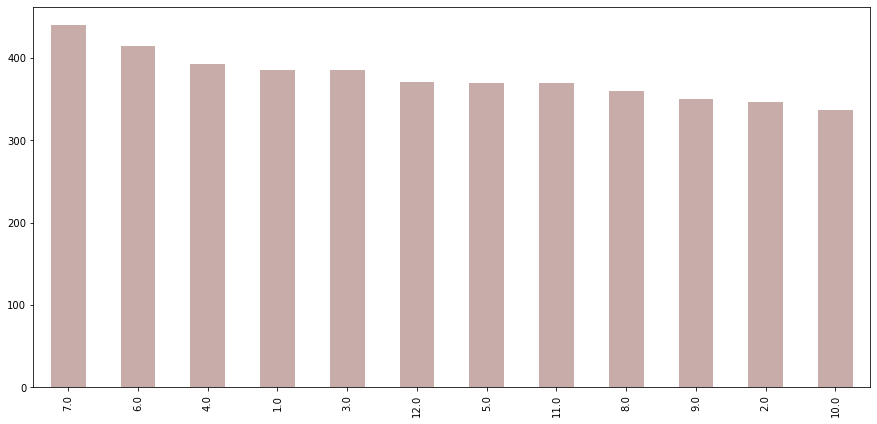

In [101]:
df70['zodiac'].value_counts().plot(kind="bar", figsize=(15,7), color= "#c8aca9")
#note: I want to change this visual to include each color, descending and apply new zodiac columns for names of signs

In [102]:
#next steps: 
#create Zodiac column that lists names in place of numbers, for comparisons and clarity
#drop 70's decade nulls
#concat 80's decade nulls
#look at univariates to determine other null drops (possibly added columns due to shape issues between years?)